## Task 1:
### Problem - Develop and evaluate an image classifier using Convolution Neural Network.

### The Data = CIFAR 10 datset.

CIFAR-10 is a dataset of 50,000 32x32 color training images, labeled over 10 categories, and 10,000 test images.
https://www.cs.toronto.edu/~kriz/cifar.html


# CIFAR-10 Multiple Classes
# New section
Example of using Keras for CNNs. Use a famous data set, the CIFAR-10 dataset which consists of 10 different image types.

In [1]:
#
# Your code to import matplotlib, pandas and numpy libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Following code loads the CIFAR 10 datset.

In [2]:
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 18s 0us/step


In [3]:
#
# Your code to print shapes of training and test data. Check how the data looks
x_train.shape , y_train.shape, x_test.shape, y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [4]:
# Your code to print the shape of one image.
x_train[0].shape

(32, 32, 3)

In [5]:
cifar10

<module 'keras.datasets.cifar10' from 'D:\\Anaconda\\Lib\\site-packages\\keras\\datasets\\cifar10\\__init__.py'>

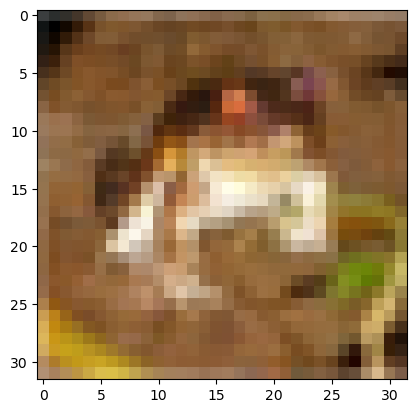

In [6]:
# Your code to show any sample image in the dataset. Use - plt.imshow()

plt.imshow(x_train[0])

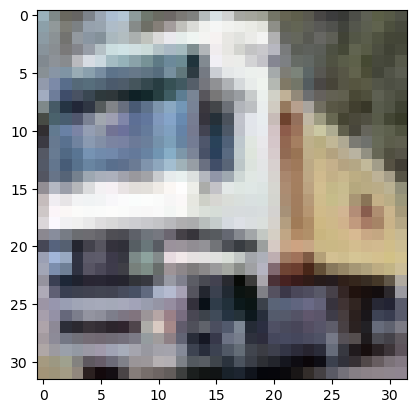

In [7]:
# Show any other image
plt.imshow(x_train[1])

# PreProcessing

In [8]:
# Your code to print one image in digitals. Check how pixels look like. 
print(x_train[0])

[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]


In [9]:
# Your code to print shape of any image i.e particular value in the x_train
x_train[10].shape

(32, 32, 3)

In [10]:
# Your code to print the maximum value in x_train. Hint - Use .max()
x_train[0].max()

255

In [11]:
x_train = x_train/255
x_test = x_test/255

In [12]:
# Print the shape of x_train again.
x_train.shape

(50000, 32, 32, 3)

In [13]:
# Print the shape of y_train again.
y_train.shape

(50000, 1)

# One hot vector encoding.
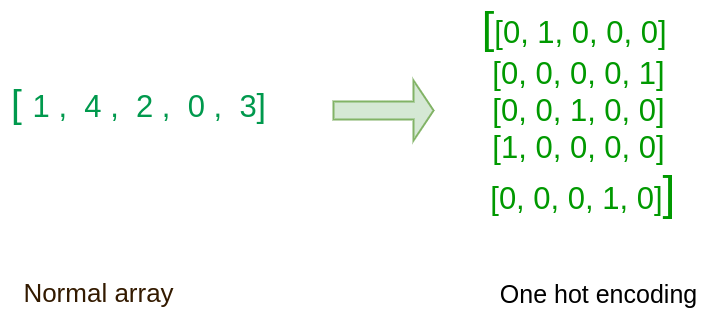


The "to_categorical()" is converting the integer value to binary categorical matrix :: https://keras.io/api/utils/python_utils/#to_categorical-functionLinks to an external site.

In [14]:
from tensorflow.keras.utils import to_categorical

# Your code to print shape of y_train [0]
y_train[0].shape

# Your code to use to_categorical to convert integers to numbers. Assign the new array to the variable y_cat_train
y_cat_train = to_categorical(y_train,10)

In [15]:
# Your code to print shape of the array y_cat_train
y_cat_train.shape

(50000, 10)

In [16]:
# Your code to print any single value in the array y_cat_train and print y_train with the same index.
y_cat_train[1]
# Compare the result for better understanding of "to_categorical()"

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])

In [17]:
# Your code to:
# Convert y_test to the encoded vector in same manner/ Assign it to the variable y_cat_test
y_cat_test = to_categorical(y_test,10)
# Print the shapes to look how y_cat_test looks.
y_cat_test.shape

(10000, 10)

----------
# Building the Model

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from keras import layers
from keras import activations

#### Please read the following links before creating code for the next cell

https://keras.io/api/layers/convolution_layers/convolution2d/
    
https://keras.io/api/layers/pooling_layers/max_pooling2d/

In [46]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))
model.add(MaxPool2D(pool_size=(2, 2)))

#
# Add more convolution and pooling layers with your choice of filters, strides, and activation function
model.add(Conv2D(filters=64, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))

model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())

#
# Add few dense layers. 
model.add(layers.Dense(256, activation='relu'))

#Last layer is the classsifier, thus 10 possible classes
model.add(layers.Dense(10, activation='softmax'))






In [47]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 29, 29, 32)          │           1,568 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 11, 11, 64)          │          32,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 256)                 │         409,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 446,826 (1.70 MB)

 Trainable params: 446,826 (1.70 MB)

 Non-trainable params: 0 (0.00 B)

### We could use early stopping in Keras to break from the training.
### What this does is for successive iterations it monitors the loss. If the loss does not decreases for a certain number of iterations denoted by variable 'patience' then the training stops.
### Following code shows how you can use early stopping.


In [48]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=3)

In [49]:
# Your code to compile the models (model.compile). Use 'categorical cross entropy' as the loss function
# and use 'accuracy' as the metrics
# Your can use the optimiser of your choice

model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='rmsprop')

In [50]:
# Your code to fit the model (model.fit). Use additional parameter -  callbacks = [early_stop] to eanable early stopping. 
# use 'history' array to save the training parameters for each epoch
history = model.fit(x_train, y_cat_train, batch_size=128, epochs=20, 
                    callbacks=[early_stop], validation_data= (x_test, y_cat_test), shuffle=True,
                    verbose=1)

Epoch 1/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.2927 - loss: 1.9486 - val_accuracy: 0.4733 - val_loss: 1.4595
Epoch 2/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.5133 - loss: 1.3779 - val_accuracy: 0.5203 - val_loss: 1.3264
Epoch 3/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.5900 - loss: 1.1755 - val_accuracy: 0.5743 - val_loss: 1.2218
Epoch 4/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.6424 - loss: 1.0261 - val_accuracy: 0.6381 - val_loss: 1.0200
Epoch 5/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.6904 - loss: 0.8988 - val_accuracy: 0.6226 - val_loss: 1.0956
Epoch 6/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.7164 - loss: 0.8165 - val_accuracy: 0.6684 - val_loss: 0.9739
Epoch 7/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.7523 - loss: 0.7140 - val_accuracy: 0.6917 - val_loss: 0.9064
Epoch 8/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.7840 - loss: 0.6246 - val_accu

### We can save the model in a file. Following code shows how to do this.

In [43]:
# Careful, don't overwrite file!
model.save('cifar_10epochs.keras')

### We can save the loss at every step. Following code shows how to do this. 

In [44]:
losses = pd.DataFrame(model.history.history)

In [52]:
# Print first few rows of losses.
losses.head(10)

,accuracy,loss,val_accuracy,val_loss
0,0.33346,1.837169,0.4362,1.580683
1,0.46394,1.503336,0.4980,1.435423
2,0.52718,1.341606,0.5641,1.270934
3,0.56658,1.238347,0.5382,1.297619
4,0.59068,1.164911,0.5516,1.312438
5,0.61434,1.105103,0.5904,1.202039
6,0.63050,1.053609,0.6213,1.101591
7,0.65102,1.003942,0.5895,1.199790
8,0.66590,0.956679,0.6323,1.079941
9,0.68080,0.919643,0.6160,1.136134


### Visualise a plot between accuracy vs val_accuracy for all steps.

### x axis will have the steps (epochs) 
### y axis will have accuracy and val_accuracy 





<Axes: >

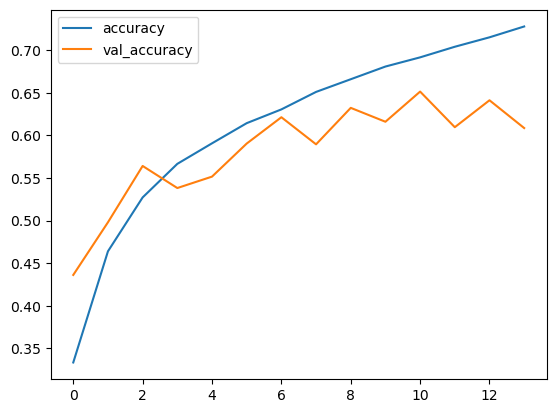

In [53]:
# 
# Your code to plot accuracy and val_accuracy vs the epochs
losses[['accuracy','val_accuracy']].plot()

<Axes: >

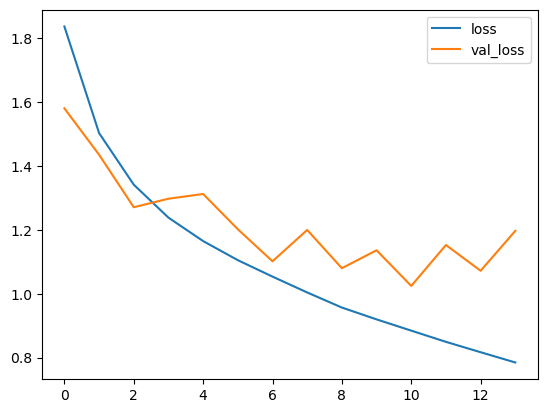

In [54]:
# 
# Your code to plot loss and val_loss vs the epochs
losses[['loss','val_loss']].plot()

### You could print the metrics name that model have used.

### Following code shows how to do this.

In [ ]:
model.metrics_names

['loss', 'accuracy']

### Following code shows how to evaluate your model.

In [ ]:
model.evaluate(x_test,y_cat_test,verbose=0)

### Make a prediction on test data set.   

In [ ]:
predictions_prob = model.predict(x_test)
predictions = predictions_prob.argmax(axis = -1)

### We could get the full classification report. 

In [ ]:
# Your code to import classification_report library from sklearn.metrics


In [ ]:
classification_report(y_test, predictions)

### We could also get and plot confusion matrix. 

https://github.com/matplotlib/matplotlib/issues/14751

In [ ]:
# Your code to import confusion_matrix library from sklearn.metrics


In [ ]:
confusion_matrix(y_test,predictions)

In [ ]:
import seaborn as sns

plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test,predictions),annot=True)


# Following code makes a prediction on specific image.

In [ ]:
my_image = x_test[16]

In [ ]:
plt.imshow(my_image)

In [ ]:
# SHAPE --> (num_images,width,height,color_channels)

model.predict(my_image.reshape(1,32,32,3))

array([5])

In [1]:
# Find the highest probability value in the vector above. 
# What output value does it point to?

In [ ]:
# Check your result to run the code:

np.argmax(model.predict(my_image.reshape(1,32,32,3)), axis = -1)

### Let's use a trained neural network
You can run the following code many times

Note the recognition probabilities for each image

In [ ]:
from tensorflow.keras.preprocessing.image import array_to_img

# Class names in the CIFAR-10 dataset
classes=['aircraft', 'car', 'bird', 'cat', 'deer',
'dog', 'frog', 'hors', 'ship', 'truck']

# we take a random element 'random.randint()' from the test sample
# and observe: the neural network will guess or not
index = random.randint(0, x_test.shape[0])
plt.imshow(array_to_img(x_test[index]))

# test image conversion
x = x_test[index]
x = np.expand_dims(x, axis=0)

# start recognition
prediction = model.predict(x)
sample = x

# converting the result from one hot encoding format
ans = np.argmax(prediction)

fig = plt.figure(figsize=(12,4))

ax = fig.add_subplot(1, 2, 2)
bar_list = ax.bar(np.arange(10), prediction[0], align='center')
bar_list[ans].set_color('g')
ax.set_xticks(np.arange(10))
ax.set_xlim([-1, 10])
ax.grid('on')

plt.show()

print('The predicted answer: {}'.format((classes[ans])), "\n",
     'Correct answer: {}'.format(classes[y_test[index][0]]) )

print(classes)


# You can run this cell many times, and each time you will get a new picture,which
# this neural network will recognise with the probability indicated on the graph.

## Task 2:

Evaluate your model for different optimisers available in the Keras. 

https://keras.io/api/optimizers/

- Store the optimisers in an array.
- Use for loop to fit, compile, and  test your model.
- Plot the accuracy vs optimiser


In [3]:
# Create a list containing the names of optimisers (Don't use 'AdamW' and 'Adafactor')
# Create an empty list to store scores

# For every optimiser
   # compile your model
   # fit your model, use epochs=3 for each optimiser (otherwise the training will take a long time)
   # using model.evaluate() find score and append the score in a list

# Plot score vs optimiser 

# Lab logbook requirement: 
# Please ensure to document in your laboratory logbook a graphical representation depicting the train loss and validation loss trends. 
# Based on this analysis, determine the optimal number of epochs for training your model. 